In [2]:
import numpy as np
import pandas as pd
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

# importing the 10 years of Apple stock price data

In [3]:
df_stocks = pd.read_pickle("C:/Users/Mayur/Documents/Advance Data Science/Python Code/NYTimesData/Data/Datapickled_ten_year_filtered_lead_para1.pkl")
df_stocks.count()
df_stocks.head(10)

,close,articles
2007-01-04,12.237100,. I Feel Bad About My Face. Bush Recycles the ...
2007-01-05,12.150000,. And This Is Detroit Once the Aliens Showed U...
2007-01-06,12.170000,. Send in a Romo Headline. Game Over! Seahawks...
2007-01-07,12.190000,. Happiness 101. Let's Start This Over. Get Me...
2007-01-08,12.210000,. Join the Toyota Marketing Machine. That R2 U...
2007-01-09,13.224300,. Two Stars Enter Hall; Steroid Cloud Stops 3r...
2007-01-10,13.857100,. A Ride in a Gaming Chair. More iPhone Fun Fa...
2007-01-11,13.685700,". Duke Accuser Contradicts Herself and Says 2,..."
2007-01-12,13.517100,. More on Black. Bird Flu in Indonesia - Part ...
2007-01-13,13.605675,". Game Over: Saints 27, Eagles 24. Sunday's Br..."


In [4]:
df_stocks.isnull().sum()

close       0
articles    0
dtype: int64

In [5]:
df_stocks['prices'] = df_stocks['close'].apply(np.int64)
df_stocks.head(10)

,close,articles,prices
2007-01-04,12.237100,. I Feel Bad About My Face. Bush Recycles the ...,12
2007-01-05,12.150000,. And This Is Detroit Once the Aliens Showed U...,12
2007-01-06,12.170000,. Send in a Romo Headline. Game Over! Seahawks...,12
2007-01-07,12.190000,. Happiness 101. Let's Start This Over. Get Me...,12
2007-01-08,12.210000,. Join the Toyota Marketing Machine. That R2 U...,12
2007-01-09,13.224300,. Two Stars Enter Hall; Steroid Cloud Stops 3r...,13
2007-01-10,13.857100,. A Ride in a Gaming Chair. More iPhone Fun Fa...,13
2007-01-11,13.685700,". Duke Accuser Contradicts Herself and Says 2,...",13
2007-01-12,13.517100,. More on Black. Bird Flu in Indonesia - Part ...,13
2007-01-13,13.605675,". Game Over: Saints 27, Eagles 24. Sunday's Br...",13


In [6]:
df_stocks.isnull().sum()

close       0
articles    0
prices      0
dtype: int64

In [7]:
df_stocks.index

DatetimeIndex(['2007-01-04', '2007-01-05', '2007-01-06', '2007-01-07',
               '2007-01-08', '2007-01-09', '2007-01-10', '2007-01-11',
               '2007-01-12', '2007-01-13',
               ...
               '2017-10-06', '2017-10-07', '2017-10-08', '2017-10-09',
               '2017-10-10', '2017-10-11', '2017-10-12', '2017-10-13',
               '2017-10-14', '2017-10-15'],
              dtype='datetime64[ns]', length=3938, freq='D')

In [8]:
df_stocks = df_stocks[['prices','articles']]
df_stocks['articles'].map(lambda x:x.lstrip('.-'))
df_stocks.head(10)


,prices,articles
2007-01-04,12,. I Feel Bad About My Face. Bush Recycles the ...
2007-01-05,12,. And This Is Detroit Once the Aliens Showed U...
2007-01-06,12,. Send in a Romo Headline. Game Over! Seahawks...
2007-01-07,12,. Happiness 101. Let's Start This Over. Get Me...
2007-01-08,12,. Join the Toyota Marketing Machine. That R2 U...
2007-01-09,13,. Two Stars Enter Hall; Steroid Cloud Stops 3r...
2007-01-10,13,. A Ride in a Gaming Chair. More iPhone Fun Fa...
2007-01-11,13,". Duke Accuser Contradicts Herself and Says 2,..."
2007-01-12,13,. More on Black. Bird Flu in Indonesia - Part ...
2007-01-13,13,". Game Over: Saints 27, Eagles 24. Sunday's Br..."


In [9]:
df_stocks[df_stocks.articles == ""]
#len(df_stocks[df_stocks.articles != ""])

,prices,articles
2007-04-20,12,
2017-08-02,157,
2017-08-04,156,
2017-08-06,158,
2017-08-08,160,
2017-08-10,155,
2017-08-12,158,
2017-08-14,159,
2017-08-16,160,
2017-08-18,157,


In [10]:
df = df_stocks.copy()
df = df.drop('articles', axis=1)
df['compound'] = ''
df['neg'] = ''
df['neu'] = ''
df['pos'] = '' 
df.head(10)

,prices,compound,neg,neu,pos
2007-01-04,12,,,,
2007-01-05,12,,,,
2007-01-06,12,,,,
2007-01-07,12,,,,
2007-01-08,12,,,,
2007-01-09,13,,,,
2007-01-10,13,,,,
2007-01-11,13,,,,
2007-01-12,13,,,,
2007-01-13,13,,,,


In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

sanalyser = SentimentIntensityAnalyzer()



In [12]:
for date, row in df_stocks.T.iteritems():
    try:
        abc = str(df_stocks.loc[date, 'articles'])
        #print(date)
        #senetence = unicode(abc, 'utf-8')
        #sentence = unicodedata.normalize('NFKD', abc).encode('utf-8','ignore')
        ss = sanalyser.polarity_scores(abc)
        ss
        df.set_value(date, 'compound', ss['compound'])
        df.set_value(date, 'neg', ss['neg'])
        df.set_value(date, 'neu', ss['neu'])
        df.set_value(date, 'pos', ss['pos'])
    except TypeError:
        print(df+stocks.loc[date, 'articles'])
        print(date)

In [13]:
df
#df[df.compound == "0"]

,prices,compound,neg,neu,pos
2007-01-04,12,-0.9796,0.092,0.824,0.084
2007-01-05,12,0.9834,0.076,0.846,0.078
2007-01-06,12,-0.9896,0.11,0.8,0.09
2007-01-07,12,0.9988,0.098,0.781,0.12
2007-01-08,12,-0.9713,0.097,0.813,0.09
2007-01-09,13,-0.9995,0.13,0.795,0.074
2007-01-10,13,-0.9389,0.101,0.801,0.098
2007-01-11,13,-0.9996,0.128,0.812,0.06
2007-01-12,13,-0.9994,0.125,0.809,0.065
2007-01-13,13,-0.9986,0.147,0.768,0.085


In [14]:
df["compound"] = df["compound"].replace(to_replace = 0, method = 'ffill')
df["neg"] = df["neg"].replace(to_replace = 0, method = 'ffill')
df["pos"] = df["pos"].replace(to_replace = 0, method = 'ffill')
df["neu"] = df["neu"].replace(to_replace = 0, method = 'ffill')

In [15]:
train_start_date = '2007-01-04'
train_end_date = '2014-12-31'
test_start_date = '2015-01-01'
test_end_date = '2017-10-15'

In [16]:
train = df.loc[train_start_date : train_end_date]
test = df.loc[test_start_date : test_end_date]

In [17]:
train.count()

prices      2919
compound    2919
neg         2919
neu         2919
pos         2919
dtype: int64

In [18]:
test.count()

prices      1019
compound    1019
neg         1019
neu         1019
pos         1019
dtype: int64

In [19]:
sentiment_score_list = []
for date, row in train.T.iteritems():
    sentiment_score = np.asarray([df.loc[date, 'neg'], df.loc[date, 'pos']])
    sentiment_score_list.append(sentiment_score)
    
numpy_df_train = np.asarray(sentiment_score_list)
numpy_df_train

array([[ 0.092,  0.084],
       [ 0.076,  0.078],
       [ 0.11 ,  0.09 ],
       ..., 
       [ 0.104,  0.091],
       [ 0.12 ,  0.108],
       [ 0.109,  0.096]])

In [20]:
sentiment_score_list = []
for date, row in test.T.iteritems():
    sentiment_score = np.asarray([df.loc[date, 'neg'], df.loc[date, 'pos']])
    sentiment_score_list.append(sentiment_score)
    
numpy_df_test = np.asarray(sentiment_score_list)
numpy_df_test

array([[ 0.111,  0.123],
       [ 0.11 ,  0.076],
       [ 0.116,  0.088],
       ..., 
       [ 0.076,  0.067],
       [ 0.076,  0.067],
       [ 0.076,  0.067]])

In [21]:
y_train = pd.DataFrame(train['prices'])
y_test = pd.DataFrame(test['prices'])

In [22]:
import numpy as np 
print(np.__version__) 
print(np.__path__)

1.13.3
['C:\\Users\\Mayur\\Anaconda3\\lib\\site-packages\\numpy']


In [23]:
from treeinterpreter import treeinterpreter as ti
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(numpy_df_train, y_train)
print(rf.feature_importances_)

[ 0.52626416  0.47373584]


C:\Users\Mayur\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [25]:
prediction, bias, contributions = ti.predict(rf, numpy_df_test)
prediction, bias, contributions

(array([ 52.45      ,  42.05      ,  66.2       , ...,  57.62666667,
         57.62666667,  57.62666667]),
 array([ 48.26937307,  48.26937307,  48.26937307, ...,  48.26937307,
         48.26937307,  48.26937307]),
 array([[  7.47471875,  -3.29409183],
        [-11.26027774,   5.04090466],
        [ 20.76221292,  -2.83158599],
        ..., 
        [ -2.28853919,  11.64583278],
        [ -2.28853919,  11.64583278],
        [ -2.28853919,  11.64583278]]))

In [26]:
import matplotlib.pyplot as plt

In [27]:
idx = pd.date_range(test_start_date, test_end_date)
len(idx)
predictions_df = pd.DataFrame(data = prediction[0:], index = idx, columns=['Pprices'])
predictions_df.head(10)

,Pprices
2015-01-01,52.450000
2015-01-02,42.050000
2015-01-03,66.200000
2015-01-04,34.050000
2015-01-05,46.200000
2015-01-06,22.800000
2015-01-07,55.066667
2015-01-08,40.850000
2015-01-09,34.800000
2015-01-10,48.800000


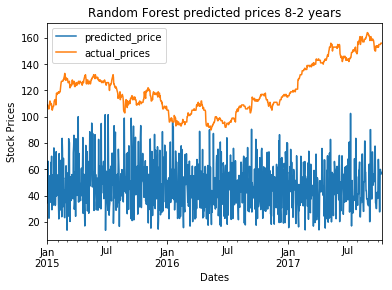

In [28]:
ax = predictions_df.rename(columns={"Pprices": "predicted_price"}).plot(title='Random Forest predicted prices 8-2 years')
ax.set_xlabel("Dates")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns = {'prices':'actual_prices'}).plot(ax = ax).get_figure()
fig

In [29]:
from datetime import datetime, timedelta

temp_date = test_start_date
average_last_5_days_test = 0
total_days = 10
for i in range(total_days):
    average_last_5_days_test += test.loc[temp_date, 'prices']
    # Converting string to date time
    temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
    # Reducing one day from date time
    difference = temp_date + timedelta(days=1)
    # Converting again date time to string
    temp_date = difference.strftime('%Y-%m-%d')
    #print temp_date
average_last_5_days_test = average_last_5_days_test / total_days
print(average_last_5_days_test)



108.6


In [30]:
temp_date = test_start_date
average_upcoming_5_days_predicted = 0
for i in range(total_days):
    average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'Pprices']
    # Converting string to date time
    temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
    # Adding one day from date time
    difference = temp_date + timedelta(days=1)
    # Converting again date time to string
    temp_date = difference.strftime('%Y-%m-%d')
    print(temp_date)
average_upcoming_5_days_predicted = average_upcoming_5_days_predicted / total_days
print(average_upcoming_5_days_predicted)
#average train.loc['2013-12-31', 'prices'] - advpredictions_df.loc['2014-01-01', 'prices']
difference_test_predicted_prices = average_last_5_days_test - average_upcoming_5_days_predicted
print(difference_test_predicted_prices)

2015-01-02
2015-01-03
2015-01-04
2015-01-05
2015-01-06
2015-01-07
2015-01-08
2015-01-09
2015-01-10
2015-01-11
44.3266666667
64.2733333333


In [31]:

# Adding 6177 to all the advpredictions_df price values
predictions_df['Pprices'] = predictions_df['Pprices'] + difference_test_predicted_prices
predictions_df.head(10)

,Pprices
2015-01-01,116.723333
2015-01-02,106.323333
2015-01-03,130.473333
2015-01-04,98.323333
2015-01-05,110.473333
2015-01-06,87.073333
2015-01-07,119.340000
2015-01-08,105.123333
2015-01-09,99.073333
2015-01-10,113.073333


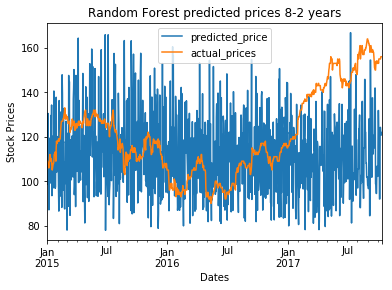

In [32]:
ax = predictions_df.rename(columns={"Pprices": "predicted_price"}).plot(title='Random Forest predicted prices 8-2 years')
ax.set_xlabel("Dates")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns = {'prices':'actual_prices'}).plot(ax = ax).get_figure()
fig

In [33]:
test.head(5)

,prices,compound,neg,neu,pos
2015-01-01,109,0.9543,0.111,0.766,0.123
2015-01-02,109,-0.9939,0.11,0.814,0.076
2015-01-03,108,-0.9864,0.116,0.796,0.088
2015-01-04,107,-0.9274,0.091,0.826,0.083
2015-01-05,106,0.9957,0.111,0.753,0.136


# Smoothing the time series data
#Applying Average to smooth the stock prices¶

In [34]:
erre = test['prices'] - predictions_df['Pprices']
sqrerr = np.square(erre)
mse = np.average(sqrerr)
rmse = np.sqrt(mse)
rmse

26.841638889432481

In [35]:
# Adding 6177 to all the advpredictions_df price values
predictions_df['Pprices'] = predictions_df['Pprices'] - smoothFact
predictions_df.head(10)

NameError: name 'smoothFact' is not defined

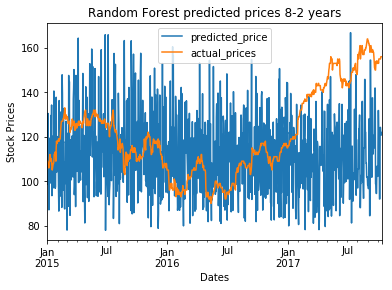

In [36]:
ax = predictions_df.rename(columns={"Pprices": "predicted_price"}).plot(title='Random Forest predicted prices 8-2 years')
ax.set_xlabel("Dates")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns = {'prices':'actual_prices'}).plot(ax = ax).get_figure()
fig

# Smoothing the time series data-----Applying EWMA pandas to smooth the stock prices

In [37]:
predictions_df['ewma'] = pd.ewma(predictions_df["Pprices"], span=60, freq="D")

predictions_df.head(10)

C:\Users\Mayur\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=60,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()
  """Entry point for launching an IPython kernel.


,Pprices,ewma
2015-01-01,116.723333,116.723333
2015-01-02,106.323333,111.436667
2015-01-03,130.473333,117.994896
2015-01-04,98.323333,112.828425
2015-01-05,110.473333,112.325491
2015-01-06,87.073333,107.758416
2015-01-07,119.340000,109.582893
2015-01-08,105.123333,108.958284
2015-01-09,99.073333,107.707922
2015-01-10,113.073333,108.328454


In [38]:
predictions_df['actual_value'] = test['prices']
predictions_df['actual_value_ewma'] = pd.ewma(predictions_df["actual_value"], span=60, freq="D")
predictions_df.head(10)

C:\Users\Mayur\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=60,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()
  


,Pprices,ewma,actual_value,actual_value_ewma
2015-01-01,116.723333,116.723333,109,109.000000
2015-01-02,106.323333,111.436667,109,109.000000
2015-01-03,130.473333,117.994896,108,108.655495
2015-01-04,98.323333,112.828425,107,108.220701
2015-01-05,110.473333,112.325491,106,107.746467
2015-01-06,87.073333,107.758416,106,107.430603
2015-01-07,119.340000,109.582893,107,107.362769
2015-01-08,105.123333,108.958284,111,107.872202
2015-01-09,99.073333,107.707922,112,108.394333
2015-01-10,113.073333,108.328454,111,108.695689


In [39]:
# Changing column names
predictions_df.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']

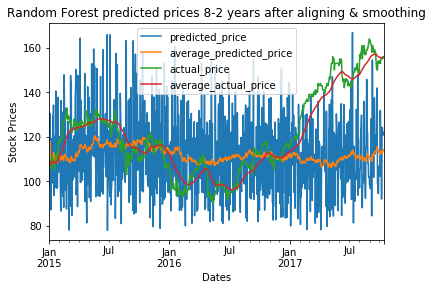

In [40]:
# Now plotting test predictions after smoothing
predictions_plot = predictions_df.plot(title='Random Forest predicted prices 8-2 years after aligning & smoothing')
predictions_plot.set_xlabel("Dates")
predictions_plot.set_ylabel("Stock Prices")
fig = predictions_plot.get_figure()
fig

In [41]:
# Save the graph
fig.savefig("C:/Users/Mayur/Documents/Advance Data Science/Python Code/NYTimesData/Graph_AAPL/random forest after smoothing.png")

# LogisticRegression

In [42]:

from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from datetime import datetime, timedelta

In [43]:
sentiment_score_list = []
for date, row in train.T.iteritems():
    sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
    #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
    sentiment_score_list.append(sentiment_score)
numpy_df_train = np.asarray(sentiment_score_list)
sentiment_score_list = []
for date, row in test.T.iteritems():
    sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
    #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
    sentiment_score_list.append(sentiment_score)
numpy_df_test = np.asarray(sentiment_score_list)

In [44]:
# Generating models
lr = LogisticRegression()
lr.fit(numpy_df_train, train['prices'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [45]:
numpy_df_train

array([[ 0.092,  0.084],
       [ 0.076,  0.078],
       [ 0.11 ,  0.09 ],
       ..., 
       [ 0.104,  0.091],
       [ 0.12 ,  0.108],
       [ 0.109,  0.096]])

In [46]:
prediction = lr.predict(numpy_df_test)
prediction_list = []
prediction_list.append(prediction)

In [47]:
prediction_list

[array([12, 12, 12, ..., 12, 12, 12], dtype=int64)]

In [48]:
idx = pd.date_range(test_start_date, test_end_date)
#print year
predictions_df_list = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])

# Increasing the prices by a constant value so that it represents closing price during the testing

In [49]:
def offset_value(test_start_date, test, predictions_df):
    temp_date = test_start_date
    average_last_5_days_test = 0
    average_upcoming_5_days_predicted = 0
    total_days = 1
    for i in range(total_days):
        average_last_5_days_test += test.loc[temp_date, 'prices']
        temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
        difference = temp_date + timedelta(days=1)
        temp_date = difference.strftime('%Y-%m-%d')
    average_last_5_days_test = average_last_5_days_test / total_days

    temp_date = test_start_date
    for i in range(total_days):
        average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
        temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
        difference = temp_date + timedelta(days=1)
        temp_date = difference.strftime('%Y-%m-%d')
    average_upcoming_5_days_predicted = average_upcoming_5_days_predicted / total_days
    difference_test_predicted_prices = average_last_5_days_test - average_upcoming_5_days_predicted
    return difference_test_predicted_prices

In [50]:
difference_test_predicted_prices = offset_value(test_start_date, test, predictions_df_list)
# Adding offset to all the advpredictions_df price values
predictions_df_list['prices'] = predictions_df_list['prices'] + difference_test_predicted_prices
predictions_df_list.head(10)

,prices
2015-01-01,109.0
2015-01-02,109.0
2015-01-03,109.0
2015-01-04,109.0
2015-01-05,109.0
2015-01-06,109.0
2015-01-07,109.0
2015-01-08,109.0
2015-01-09,109.0
2015-01-10,109.0


In [51]:
print(difference_test_predicted_prices)

97.0


In [52]:
erre = test['prices'] - predictions_df_list['prices']
sqrerr = np.square(erre)
mse = np.average(sqrerr)
rmse = np.sqrt(mse)
print("rmse: ", rmse)

#predictions_df_list['prices'] = predictions_df_list['prices'] - smoothFact
#predictions_df.head(10)

rmse:  22.214252469


In [54]:
# Smoothing the plot
predictions_df_list['ewma'] = pd.ewma(predictions_df_list["prices"], span=10, freq="D")
predictions_df_list['actual_value'] = test['prices']
predictions_df_list['actual_value_ewma'] = pd.ewma(predictions_df_list["actual_value"], span=10, freq="D")

C:\Users\Mayur\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=10,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()
  
C:\Users\Mayur\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=10,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()
  after removing the cwd from sys.path.


In [55]:
# Changing column names
predictions_df_list.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']

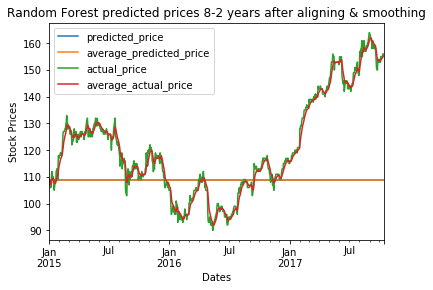

In [56]:
#predictions_df_list.plot()
# Now plotting test predictions after smoothing
predictions_plot = predictions_df_list.plot(title='Random Forest predicted prices 8-2 years after aligning & smoothing')
predictions_plot.set_xlabel("Dates")
predictions_plot.set_ylabel("Stock Prices")
fig = predictions_plot.get_figure()
fig

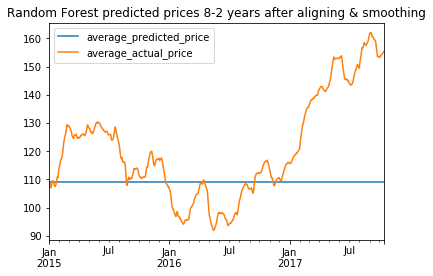

In [58]:
predictions_df_list_average = predictions_df_list[['average_predicted_price', 'average_actual_price']]

type(predictions_df_list_average)
x = predictions_df_list_average.plot(title='Random Forest predicted prices 8-2 years after aligning & smoothing')
y = x.get_figure()
y



In [59]:
predictions_df_list

,predicted_price,average_predicted_price,actual_price,average_actual_price
2015-01-01,109.0,109.0,109,109.000000
2015-01-02,109.0,109.0,109,109.000000
2015-01-03,109.0,109.0,108,108.598007
2015-01-04,109.0,109.0,107,108.071535
2015-01-05,109.0,109.0,106,107.476853
2015-01-06,109.0,109.0,106,107.093264
2015-01-07,109.0,109.0,107,107.070791
2015-01-08,109.0,109.0,111,107.964705
2015-01-09,109.0,109.0,112,108.842644
2015-01-10,109.0,109.0,111,109.295810


# MLP Classifier

In [60]:
from sklearn.neural_network import MLPClassifier
from datetime import datetime, timedelta

In [61]:
train_start_date = '2007-01-04'
train_end_date = '2014-12-31'
test_start_date = '2015-01-01'
test_end_date = '2017-10-15'
train = df.ix[train_start_date : train_end_date]
test = df.ix[test_start_date:test_end_date]
    


C:\Users\Mayur\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """


In [62]:
# Calculating the sentiment score
sentiment_score_list = []
for date, row in train.T.iteritems():
    sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'pos']]) #df.loc[date, 'compound'],df.loc[date, 'neu']
    #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
    sentiment_score_list.append(sentiment_score)
numpy_df_train = np.asarray(sentiment_score_list)


In [63]:
sentiment_score_list[1:5]

[array([ 0.9834,  0.076 ,  0.078 ]),
 array([-0.9896,  0.11  ,  0.09  ]),
 array([ 0.9988,  0.098 ,  0.12  ]),
 array([-0.9713,  0.097 ,  0.09  ])]

In [64]:
sentiment_score_list = []
for date, row in test.T.iteritems():
    sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'pos']]) #df.loc[date, 'compound'],,df.loc[date, 'neu']
    #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
    sentiment_score_list.append(sentiment_score)
numpy_df_test = np.asarray(sentiment_score_list)

In [65]:
# Generating models                
mlpc = MLPClassifier(hidden_layer_sizes=(500, 250, 200, 100), activation='relu', 
                         solver='lbfgs', alpha=0.005, learning_rate_init = 0.001, shuffle=False) # span = 20 # best 1
mlpc.fit(numpy_df_train, train['prices'])   
prediction = mlpc.predict(numpy_df_test)
    
#prediction_list.append(prediction)

In [66]:
mlpc

MLPClassifier(activation='relu', alpha=0.005, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(500, 250, 200, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=False, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [67]:
prediction

array([12, 12, 12, ..., 17, 17, 17], dtype=int64)

In [68]:
idx = pd.date_range(test_start_date, test_end_date)
#print year
predictions_df_MLP = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])
    
difference_test_predicted_prices = offset_value(test_start_date, test, predictions_df_MLP)
predictions_df_MLP

,prices
2015-01-01,12
2015-01-02,12
2015-01-03,12
2015-01-04,26
2015-01-05,12
2015-01-06,12
2015-01-07,12
2015-01-08,12
2015-01-09,12
2015-01-10,12


In [69]:
# Adding offset to all the advpredictions_df price values
predictions_df_MLP['prices'] = predictions_df_MLP['prices'] + difference_test_predicted_prices
predictions_df_MLP

,prices
2015-01-01,109.0
2015-01-02,109.0
2015-01-03,109.0
2015-01-04,123.0
2015-01-05,109.0
2015-01-06,109.0
2015-01-07,109.0
2015-01-08,109.0
2015-01-09,109.0
2015-01-10,109.0


In [70]:
# Smoothing the plot
predictions_df_MLP['ewma'] = pd.ewma(predictions_df_MLP["prices"], span=20, freq="D")
predictions_df_MLP['actual_value'] = test['prices']
predictions_df_MLP['actual_value_ewma'] = pd.ewma(predictions_df_MLP["actual_value"], span=20, freq="D")
predictions_df_MLP

C:\Users\Mayur\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=20,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()
  
C:\Users\Mayur\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=20,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()
  after removing the cwd from sys.path.


,prices,ewma,actual_value,actual_value_ewma
2015-01-01,109.0,109.000000,109,109.000000
2015-01-02,109.0,109.000000,109,109.000000
2015-01-03,109.0,109.000000,108,108.632806
2015-01-04,123.0,113.041584,107,108.161440
2015-01-05,109.0,112.063959,106,107.638606
2015-01-06,109.0,111.417604,106,107.292935
2015-01-07,109.0,110.960495,107,107.237548
2015-01-08,109.0,110.621613,111,107.887907
2015-01-09,109.0,110.361499,112,108.547507
2015-01-10,109.0,110.156469,111,108.916831


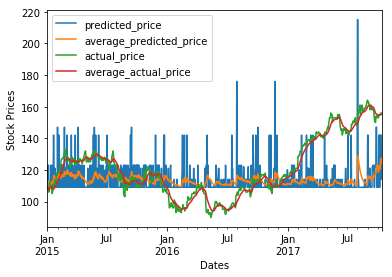

In [71]:
# Changing column names
predictions_df_MLP.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']
predictions_plot = predictions_df_MLP.plot()
predictions_plot.set_xlabel("Dates")
predictions_plot.set_ylabel("Stock Prices")
fig = predictions_plot.get_figure()
fig

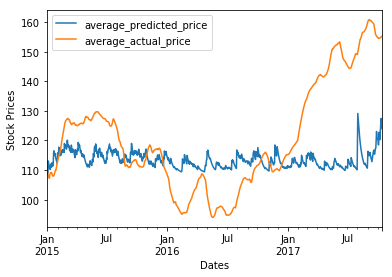

In [72]:
predictions_df_list_average = predictions_df_MLP[['average_predicted_price', 'average_actual_price']]
predictions_plot = predictions_df_list_average.plot()
predictions_plot.set_xlabel("Dates")
predictions_plot.set_ylabel("Stock Prices")
fig = predictions_plot.get_figure()
fig

In [73]:
predictions_df_list_average

,average_predicted_price,average_actual_price
2015-01-01,109.000000,109.000000
2015-01-02,109.000000,109.000000
2015-01-03,109.000000,108.632806
2015-01-04,113.041584,108.161440
2015-01-05,112.063959,107.638606
2015-01-06,111.417604,107.292935
2015-01-07,110.960495,107.237548
2015-01-08,110.621613,107.887907
2015-01-09,110.361499,108.547507
2015-01-10,110.156469,108.916831


In [74]:
import xgboost as xgb

C:\Users\Mayur\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [77]:
# read in data
dtrain = xgb.DMatrix(train)
dtest = xgb.DMatrix(test)
# specify parameters via map
param = {'max_depth':2, 'eta':1, 'silent':1, 'objective':'binary:logistic' }
num_round = 2
bst = xgb.train(param, dtrain, num_round)
# make prediction
preds = bst.predict(dtest)

ValueError: DataFrame.dtypes for data must be int, float or bool.
Did not expect the data types in fields compound, neg, neu, pos

# Deep Learning using KERAS

In [76]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [96]:
import numpy
# fix random seed for reproducibility
numpy.random.seed(7)
# split into input (X) and output (Y) variables
X = numpy_df_train
Y = y_train
X_test = numpy_df_test
Y_test = y_test
# create model
model = Sequential()
model.add(Dense(2919, input_dim=3, activation='relu'))
#model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, Y, epochs=1, batch_size=200)
# evaluate the model
scores = model.predict(X_test)

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]))

Epoch 1/1
2919/2919 [==============================] - 1s 414us/step - loss: -31.4970 - acc: 0.0000e+00

acc: 0.82%


In [97]:
len(X)

2919

In [98]:
idx = pd.date_range(test_start_date, test_end_date)
#print year
predictions_df_MLP = pd.DataFrame(data=scores[0:], index = idx, columns=['Pprices'])
    
#difference_test_predicted_prices = offset_value(test_start_date, test, predictions_df_MLP)
predictions_df_MLP["Aprice"] = Y_test
predictions_df_MLP

,Pprices,Aprice
2015-01-01,0.828589,109
2015-01-02,0.820209,109
2015-01-03,0.820535,108
2015-01-04,0.809838,107
2015-01-05,0.835230,106
2015-01-06,0.822237,106
2015-01-07,0.820492,107
2015-01-08,0.823531,111
2015-01-09,0.820408,112
2015-01-10,0.816975,111
